In [1]:
import cv2
cv2.__version__

'3.4.1'

In [2]:
import pandas as pd
red = pd.read_csv("wine-red.csv", sep=";")
white = pd.read_csv("wine-white.csv", sep=";")

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[0].hist(red.alcohol, 10, facecolor = "red", alpha=0.5, label = "Red wine")
ax[1].hist(red.alcohol, 10, facecolor = "white", ec="black", lw=0.5, alpha=0.5, label = "White wine")

fig.subplots_adjust(left = 0, right= 1, bottom=0, top=0.5, hspace= 0.05, wspace =1 )
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequecy")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")

fig.suptitle("알콜분포")
plt.show()

<Figure size 640x480 with 2 Axes>

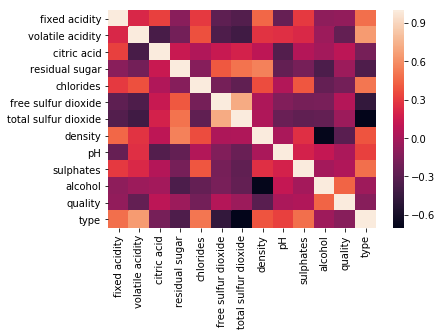

In [4]:
import seaborn as sns
red["type"] = 1
white["type"] = 0
wines = red.append(white, ignore_index= True)
corr = wines.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
plt.show()

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
X = wines.iloc[:,0:11]
y = np.ravel(wines.type)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(11,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer ='adam',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)

C:\Users\acorn\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
4352/4352 [==============================] - 3s 716us/step - loss: 0.1029 - acc: 0.9625
Epoch 2/20
4352/4352 [==============================] - 3s 658us/step - loss: 0.0231 - acc: 0.9954
Epoch 3/20
4352/4352 [==============================] - 3s 653us/step - loss: 0.0201 - acc: 0.9963
Epoch 4/20
4352/4352 [==============================] - 3s 654us/step - loss: 0.0171 - acc: 0.9970
Epoch 5/20
4

In [8]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)

2145/2145 [==============================] - 0s 24us/step
[0.032270599782750736, 0.9944055944055944]


In [9]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred.round())

array([[1584,    4],
       [   8,  549]], dtype=int64)

In [10]:
import numpy as np
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import keras
import pydot
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils.vis_utils import model_to_dot
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [11]:
#np.unique 중복을 방지한 경우의 수
num_classes = len(np.unique(y_train))
num_classes
#4D데이터 변환
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')
input_shape = (28,28,1)

In [12]:
# 정규화
max_value = X_train.max()
X_train /= max_value
X_test /= max_value
# 로딩된 y변수 값 확인 
(y_train, y_test)
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [13]:
#CNN모델: Conv2D의 기본값(4D포멧이어야 함)
#data_format=channels_last, paddings=valid, kernel_initializer=glorot_uniform
#use_bias = True, bias_initializer='zeros'
#activation=linear
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1),  #출력차수
                 activation='relu', input_shape=input_shape)) #(28,28) => (28,28,1)
model.add(MaxPooling2D(pool_size=(2,2))) # 4개의 셀을 하나로 줄인다
model.add(Conv2D(64,(3,3), activation='relu')) #input_shape 2번째 레이어에는 없음
model.add(Dropout(0.25)) #과적합 방지
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) #fc(fully connected)로 데이터 변환
model.add(Dense(128,activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
__________

In [14]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

Epoch 1/5
 3584/60000 [>.............................] - ETA: 26:10 - loss: 1.5155 - acc: 0.5167

KeyboardInterrupt: 

In [15]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 189us/step


[0.5909269062042236, 0.8639]

In [38]:
# 실전 이미지 : 10개의 클래스로
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, RMSprop

IMG_CHANNELS = 3
IMG_ROWS = 32 # 이미지 사이즈
IMG_COLS = 32
BATCH_SIZE =128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [39]:
# train 데이터 50000, 테스트 데이터 10000
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('X_train shape:', x_train.shape)
print('Y_train shape:', y_train.shape)

X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 1)


In [54]:
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

In [55]:
model = Sequential()
# CNN
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# FC
model.add(Flatten()) # FC 입력
model.add(Dense(512, activation='relu')) # hidden layer 
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total para

In [56]:
model.compile(loss="categorical_crossentropy", optimizer=OPTIM, metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
                   epochs=NB_EPOCH, validation_split = VALIDATION_SPLIT,
                   verbose=VERBOSE)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 53s 1ms/step - loss: 1.6986 - acc: 0.3974 - val_loss: 1.4300 - val_acc: 0.4980
Epoch 2/20
40000/40000 [==============================] - 51s 1ms/step - loss: 1.3468 - acc: 0.5261 - val_loss: 1.3141 - val_acc: 0.5426
Epoch 3/20
40000/40000 [==============================] - 51s 1ms/step - loss: 1.2109 - acc: 0.5732 - val_loss: 1.3015 - val_acc: 0.5377
Epoch 4/20
40000/40000 [==============================] - 51s 1ms/step - loss: 1.1157 - acc: 0.6095 - val_loss: 1.1503 - val_acc: 0.6074
Epoch 5/20
40000/40000 [==============================] - 50s 1ms/step - loss: 1.0413 - acc: 0.6384 - val_loss: 1.3852 - val_acc: 0.5427
Epoch 6/20
40000/40000 [==============================] - 51s 1ms/step - loss: 0.9822 - acc: 0.6569 - val_loss: 1.0346 - val_acc: 0.6436
Epoch 7/20
40000/40000 [==============================] - 51s 1ms/step - loss: 0.9332 - acc: 0.6739 - val_loss: 1.0070 - val_acc

In [57]:
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print("Test accuracy:", score[1])

10000/10000 [==============================] - 3s 316us/step

Test score: 1.0105620964050293
Test accuracy: 0.6582


In [59]:
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

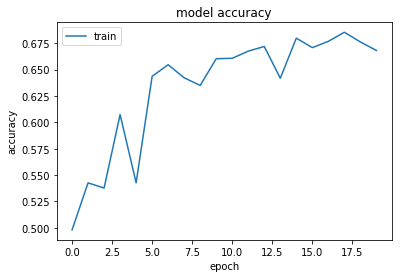

In [60]:
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1]:
import numpy as np
from imageio import imread
from skimage.transform import resize
from keras.models import model_from_json
from keras.optimizers import SGD

model_architecture = 'cifar10_architecture.json'
model_weights = 'cifar10_weights.h5'
model = model_from_json(open(model_architecture).read())
model.load_weights(model_weights)
img_names = ['cat.jpg', 'dog.jpg']
imgs = [np.transpose(resize(imread(img_name), (32, 32)), (1, 0, 2)).astype('float32') for img_name in img_names]
imgs = np.array(imgs)/255
optim = SGD()
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
predictions = model.predict_classes(imgs)
print(predictions)

C:\Users\acorn\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\acorn\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\acorn\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


[3 3]


In [9]:
import aiml
bot = aiml.Kernel()
bot.learn("my_start.aiml")
talk = str()
bot.learn(filename="little_prince.txt")

while talk != "종료":
    talk = input("사용자>")
    print(bot.respond(talk))


FATAL PARSE ERROR in file little_prince.txt:
little_prince.txt:1:0: not well-formed (invalid token)


Loading my_start.aiml...done (0.00 seconds)
Loading little_prince.txt...사용자>안녕하세요



사용자>왜그래



사용자>뭐라고?



사용자>뭐라고??



사용자>종료



In [18]:
from keras.datasets import fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
train_X.shape, test_X.shape
train_Y_one_hot = np_utils.to_categorical(train_Y)
test_Y_one_hot = np_utils.to_categorical(test_Y)
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
train_X.shape, valid_X.shape, train_label.shape, valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))